In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [2]:
import string_constants as sc
import reading_util as ru
import data_sample as ds
import discriminator as dm
import selector as se
import parameter as pa

# function definitions

In [3]:
Mjj_selection = 1100.
def analyze_discriminator_cut( discriminator, sample ):
    plt.figure(figsize=(8, 8))
    x_min = Mjj_selection*0.8
    x_max = np.percentile(sample['mJJ'], 99.99)
    loss = discriminator.strategy(sample)
    plt.hist2d(sample['mJJ'], loss,
           #range=((x_min , x_max), (np.min(loss), np.percentile(loss, 1e2*(1-1e-4)))), 
           norm=LogNorm(), bins=100, label='signal data')

    xs = np.arange(Mjj_selection, x_max, 0.001*(x_max-Mjj_selection))
    plt.plot(xs, discriminator.selector.model.predict( xs ) , '-', color='m', lw=2.5, label='selection cut')
    plt.ylabel(discriminator.strategy.title_str)
    plt.xlabel('$M_{jj}$ [GeV]')
    plt.title(sample.title() + ' ' + discriminator.title() )
    plt.colorbar()
    plt.legend(loc='best')
    plt.draw()

# runtime parameters

In [4]:
# constant fraction wrt dijet mass of BG accepted
quantile = pa.quantile_dict['q10'] # q1 = 1%
# strategy for combining loss-jet-1 and loss-jet-2
strategy = pa.loss_strategy_dict['s5'] # s5 = L1 & L2
# discriminator accepted - rejected
selector = pa.selector_dict['qr_full']

# read in data

In [5]:
SM_sample = 'qcdSigAll'
qcd_path = os.path.join( sc.concat_result_dir, sc.sample_loc[SM_sample] + sc.concat_result_suffix )
qcd_data_total = ds.read_datasample_from_file(SM_sample, qcd_path)

# load discriminator

In [6]:
reload(dm)
discriminator = dm.Discriminator( quantile, strategy, selector ) 
discriminator.load_selector('models/minl1l2_loss/qu_10pct/QR_full/model_0520_run_6.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               200       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 30,601
Trainable params: 30,601
Non-trainable params: 0
_________________________________________________________________


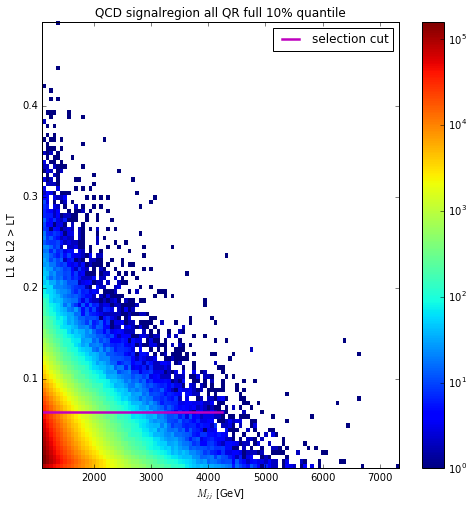

In [7]:
analyze_discriminator_cut( discriminator, qcd_data_total )